In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 500)

features = pd.read_csv("data/combinedData.csv")

features = features.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
features.head()

player class   season pos school_name conf_abbr     g  \
0          Stephen Curry    JR  2008-09   G    Davidson  Southern  34.0   
1            J.J. Redick    SR  2005-06   G        Duke       ACC  36.0   
2  Justin Wright-Foreman    SR  2018-19   G     Hofstra       CAA  35.0   
3         Doug McDermott    SR  2013-14   F   Creighton  Big East  35.0   
4          Stephen Curry    SO  2007-08   G    Davidson  Southern  36.0   

       mp   fg  fga  fg2  fg2a  fg3  fg3a   ft  fta   orb    drb  trb  ast  \
0  1145.0  312  687  182   351  130   336  220  251  21.0  130.0  151  189   
1  1336.0  302  643  163   313  139   330  221  256   7.0   64.0   71   95   
2  1321.0  330  646  220   387  110   259  178  206  12.0  129.0  141  102   
3  1181.0  330  627  234   413   96   214  178  206  57.0  187.0  244   55   
4  1193.0  317  656  155   287  162   369  135  151  28.0  137.0  165  104   

   stl  blk    tov    pf  pts   per  obpm  dbpm  bpm  ts_pct  efg_pct  \
0   86    8  126.0  81.0  974   NaN   NaN   NaN  NaN   0.604    0.549   
1   52    2   90.0  54.0  964   NaN   NaN   NaN  NaN   0.630    0.578   
2   30    7   91.0  67.0  948  28.9   7.0  -3.7  3.2   0.637    0.596   
3    8    5   62.0  67.0  934  32.8   9.8  -1.6  8.2   0.644    0.603   
4   73   14   93.0  85.0  931   NaN   NaN   NaN  NaN   0.640    0.607   

   orb_pct  drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  usg_pct  \
0      NaN      NaN      6.9     40.2      NaN      0.6     13.5     38.3   
1      NaN      NaN      3.1     15.8      NaN      0.1     10.5     31.5   
2      1.2     11.5      6.6     17.4      1.3      0.6     10.9     33.0   
3      6.4     17.8     12.6     11.5      0.4      0.5      7.9     36.2   
4      NaN      NaN      NaN      NaN      NaN      NaN     11.3      NaN   

   off_rtg  def_rtg  ows  dws    ws  pprod  year_drafted  round  pick_overall  \
0      NaN      NaN  6.4  3.6   9.9    NaN          2009      1             7   
1      NaN      NaN  6.7  1.0   7.8    NaN          2006      1            11   
2    123.8    108.7  6.3  1.0   7.4  844.0          2019      2            53   
3    127.4    106.0  6.3  1.4   7.7  788.0          2014      1            11   
4      NaN      NaN  7.0  3.3  10.3    NaN          2009      1             7   

   allStar  
0        1  
1        0  
2        0  
3        0  
4        1

In [2]:
features.describe()

g           mp           fg          fga          fg2  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     32.715029   923.905010   148.290176   308.607027   115.977228   
std       5.154462   276.627857    61.284209   127.608411    54.633689   
min       3.000000    24.000000     1.000000     4.000000     1.000000   
25%      31.000000   785.000000   107.000000   224.000000    76.000000   
50%      34.000000   989.000000   153.000000   315.000000   115.000000   
75%      36.000000  1120.000000   190.000000   400.000000   153.000000   
max      40.000000  1474.000000   330.000000   703.000000   297.000000   

              fg2a          fg3         fg3a           ft          fta  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean    220.934288    32.312947    87.672739    91.301236   124.964216   
std      98.062030    30.024388    75.467658    48.704743    62.068852   
min       3.000000     0.000000     0.000000     0.000000     0.000000   
25%     149.000000     4.000000    15.000000    54.000000    79.000000   
50%     223.000000    26.000000    76.000000    87.000000   120.000000   
75%     286.000000    52.000000   144.000000   123.000000   165.000000   
max     615.000000   162.000000   380.000000   249.000000   336.000000   

               orb          drb          trb          ast          stl  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     52.164606   125.005856   177.170462    71.150293    33.904359   
std      32.159204    57.870978    83.929206    53.276672    18.652750   
min       1.000000     3.000000     5.000000     0.000000     0.000000   
25%      25.000000    84.000000   115.000000    33.000000    20.000000   
50%      47.000000   118.000000   164.000000    58.000000    31.000000   
75%      74.000000   159.000000   227.000000    95.000000    45.000000   
max     197.000000   369.000000   504.000000   331.000000   126.000000   

               blk          tov           pf          pts         per  \
count  1537.000000  1537.000000  1537.000000  1537.000000  855.000000   
mean     25.411191    63.160052    72.256994   420.194535   21.157661   
std      25.505567    26.116409    21.195203   178.031377    5.378865   
min       0.000000     1.000000     1.000000     2.000000   -1.700000   
25%       7.000000    45.000000    60.000000   298.000000   17.800000   
50%      17.000000    64.000000    73.000000   433.000000   21.200000   
75%      34.000000    79.000000    87.000000   543.000000   24.700000   
max     186.000000   170.000000   138.000000   974.000000   40.800000   

             obpm        dbpm         bpm       ts_pct      efg_pct  \
count  743.000000  743.000000  743.000000  1537.000000  1537.000000   
mean     4.011171    3.144145    7.154778     0.566571     0.531889   
std      2.900817    2.374883    3.520548     0.052379     0.057562   
min    -10.500000   -3.700000   -6.900000     0.250000     0.200000   
25%      2.150000    1.600000    4.900000     0.536000     0.496000   
50%      4.100000    2.900000    7.400000     0.567000     0.531000   
75%      5.850000    4.500000    9.400000     0.599000     0.567000   
max     12.800000   11.700000   20.000000     0.740000     0.728000   

          orb_pct     drb_pct      trb_pct      ast_pct    stl_pct  \
count  855.000000  855.000000  1339.000000  1339.000000  855.00000   
mean     6.634152   15.796257    11.359149    14.715907    2.09193   
std      4.050177    5.631031     4.422831     8.616445    0.93558   
min      0.300000    5.600000     3.000000     0.000000    0.00000   
25%      3.100000   11.500000     7.600000     8.500000    1.50000   
50%      6.000000   14.800000    11.000000    12.700000    1.90000   
75%      9.700000   19.600000    14.700000    19.400000    2.55000   
max     23.100000   35.600000    25.700000    53.300000    8.00000   

           blk_pct      tov_pct      usg_pct     off_rtg     def_rtg  \
count  1339.000

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 49 columns):
player          1537 non-null object
class           1536 non-null object
season          1537 non-null object
pos             1537 non-null object
school_name     1537 non-null object
conf_abbr       1537 non-null object
g               1537 non-null float64
mp              1537 non-null float64
fg              1537 non-null int64
fga             1537 non-null int64
fg2             1537 non-null int64
fg2a            1537 non-null int64
fg3             1537 non-null int64
fg3a            1537 non-null int64
ft              1537 non-null int64
fta             1537 non-null int64
orb             1537 non-null float64
drb             1537 non-null float64
trb             1537 non-null int64
ast             1537 non-null int64
stl             1537 non-null int64
blk             1537 non-null int64
tov             1537 non-null float64
pf              1537 non-null float64
pts        

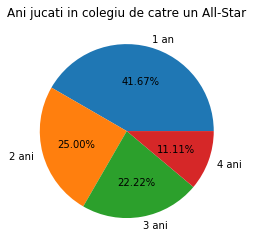

In [4]:
allStars = features[features["allStar"] == 1]
allStars = allStars.groupby(["year_drafted", "round", "pick_overall"])["player"].count()
allStars = allStars.value_counts()
plt.pie(allStars, labels=["1 an", "2 ani", "3 ani", "4 ani"], autopct='%1.2f%%')
plt.title("Ani jucati in colegiu de catre un All-Star")
plt.show()

In [12]:
# features = features.dropna()
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value_df = pd.DataFrame({'column_name': features.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(50)

column_name  percent_missing
player              player         0.000000
ast                    ast         0.000000
stl                    stl         0.000000
blk                    blk         0.000000
tov                    tov         0.000000
pf                      pf         0.000000
pick_overall  pick_overall         0.000000
trb                    trb         0.000000
ts_pct              ts_pct         0.000000
tov_pct            tov_pct         0.000000
ows                    ows         0.000000
dws                    dws         0.000000
ws                      ws         0.000000
year_drafted  year_drafted         0.000000
round                round         0.000000
efg_pct            efg_pct         0.000000
drb                    drb         0.000000
pts                    pts         0.000000
fta                    fta         0.000000
season              season         0.000000
pos                    pos         0.000000
school_name    school_name         0.000000
conf_abbr        conf_abbr         0.000000
g                        g         0.000000
orb                    orb         0.000000
mp                      mp         0.000000
fg                      fg         0.000000
allStar            allStar         0.000000
ft                      ft         0.000000
fg3a                  fg3a         0.000000
fg3                    fg3         0.000000
fga                    fga         0.000000
fg2a                  fg2a         0.000000
fg2                    fg2         0.000000
class                class         0.065062
usg_pct            usg_pct        12.882238
trb_pct            trb_pct        12.882238
ast_pct            ast_pct        12.882238
blk_pct            blk_pct        12.882238
stl_pct            stl_pct        44.372154
off_rtg            off_rtg        44.372154
def_rtg            def_rtg        44.372154
drb_pct            drb_pct        44.372154
orb_pct            orb_pct        44.372154
pprod                pprod        44.372154
per                    per        44.372154
dbpm                  dbpm        51.659076
obpm                  obpm        51.659076
bpm                    bpm        51.659076

In [13]:
# features = features.fillna(features.median())
features.head()

player class   season pos school_name conf_abbr     g  \
0          Stephen Curry    JR  2008-09   G    Davidson  Southern  34.0   
1            J.J. Redick    SR  2005-06   G        Duke       ACC  36.0   
2  Justin Wright-Foreman    SR  2018-19   G     Hofstra       CAA  35.0   
3         Doug McDermott    SR  2013-14   F   Creighton  Big East  35.0   
4          Stephen Curry    SO  2007-08   G    Davidson  Southern  36.0   

       mp   fg  fga  fg2  fg2a  fg3  fg3a   ft  fta   orb    drb  trb  ast  \
0  1145.0  312  687  182   351  130   336  220  251  21.0  130.0  151  189   
1  1336.0  302  643  163   313  139   330  221  256   7.0   64.0   71   95   
2  1321.0  330  646  220   387  110   259  178  206  12.0  129.0  141  102   
3  1181.0  330  627  234   413   96   214  178  206  57.0  187.0  244   55   
4  1193.0  317  656  155   287  162   369  135  151  28.0  137.0  165  104   

   stl  blk    tov    pf  pts   per  obpm  dbpm  bpm  ts_pct  efg_pct  \
0   86    8  126.0  81.0  974   NaN   NaN   NaN  NaN   0.604    0.549   
1   52    2   90.0  54.0  964   NaN   NaN   NaN  NaN   0.630    0.578   
2   30    7   91.0  67.0  948  28.9   7.0  -3.7  3.2   0.637    0.596   
3    8    5   62.0  67.0  934  32.8   9.8  -1.6  8.2   0.644    0.603   
4   73   14   93.0  85.0  931   NaN   NaN   NaN  NaN   0.640    0.607   

   orb_pct  drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  usg_pct  \
0      NaN      NaN      6.9     40.2      NaN      0.6     13.5     38.3   
1      NaN      NaN      3.1     15.8      NaN      0.1     10.5     31.5   
2      1.2     11.5      6.6     17.4      1.3      0.6     10.9     33.0   
3      6.4     17.8     12.6     11.5      0.4      0.5      7.9     36.2   
4      NaN      NaN      NaN      NaN      NaN      NaN     11.3      NaN   

   off_rtg  def_rtg  ows  dws    ws  pprod  year_drafted  round  pick_overall  \
0      NaN      NaN  6.4  3.6   9.9    NaN          2009      1             7   
1      NaN      NaN  6.7  1.0   7.8    NaN          2006      1            11   
2    123.8    108.7  6.3  1.0   7.4  844.0          2019      2            53   
3    127.4    106.0  6.3  1.4   7.7  788.0          2014      1            11   
4      NaN      NaN  7.0  3.3  10.3    NaN          2009      1             7   

   allStar  
0        1  
1        0  
2        0  
3        0  
4        1

In [14]:
features.describe()

g           mp           fg          fga          fg2  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     32.715029   923.905010   148.290176   308.607027   115.977228   
std       5.154462   276.627857    61.284209   127.608411    54.633689   
min       3.000000    24.000000     1.000000     4.000000     1.000000   
25%      31.000000   785.000000   107.000000   224.000000    76.000000   
50%      34.000000   989.000000   153.000000   315.000000   115.000000   
75%      36.000000  1120.000000   190.000000   400.000000   153.000000   
max      40.000000  1474.000000   330.000000   703.000000   297.000000   

              fg2a          fg3         fg3a           ft          fta  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean    220.934288    32.312947    87.672739    91.301236   124.964216   
std      98.062030    30.024388    75.467658    48.704743    62.068852   
min       3.000000     0.000000     0.000000     0.000000     0.000000   
25%     149.000000     4.000000    15.000000    54.000000    79.000000   
50%     223.000000    26.000000    76.000000    87.000000   120.000000   
75%     286.000000    52.000000   144.000000   123.000000   165.000000   
max     615.000000   162.000000   380.000000   249.000000   336.000000   

               orb          drb          trb          ast          stl  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     52.164606   125.005856   177.170462    71.150293    33.904359   
std      32.159204    57.870978    83.929206    53.276672    18.652750   
min       1.000000     3.000000     5.000000     0.000000     0.000000   
25%      25.000000    84.000000   115.000000    33.000000    20.000000   
50%      47.000000   118.000000   164.000000    58.000000    31.000000   
75%      74.000000   159.000000   227.000000    95.000000    45.000000   
max     197.000000   369.000000   504.000000   331.000000   126.000000   

               blk          tov           pf          pts         per  \
count  1537.000000  1537.000000  1537.000000  1537.000000  855.000000   
mean     25.411191    63.160052    72.256994   420.194535   21.157661   
std      25.505567    26.116409    21.195203   178.031377    5.378865   
min       0.000000     1.000000     1.000000     2.000000   -1.700000   
25%       7.000000    45.000000    60.000000   298.000000   17.800000   
50%      17.000000    64.000000    73.000000   433.000000   21.200000   
75%      34.000000    79.000000    87.000000   543.000000   24.700000   
max     186.000000   170.000000   138.000000   974.000000   40.800000   

             obpm        dbpm         bpm       ts_pct      efg_pct  \
count  743.000000  743.000000  743.000000  1537.000000  1537.000000   
mean     4.011171    3.144145    7.154778     0.566571     0.531889   
std      2.900817    2.374883    3.520548     0.052379     0.057562   
min    -10.500000   -3.700000   -6.900000     0.250000     0.200000   
25%      2.150000    1.600000    4.900000     0.536000     0.496000   
50%      4.100000    2.900000    7.400000     0.567000     0.531000   
75%      5.850000    4.500000    9.400000     0.599000     0.567000   
max     12.800000   11.700000   20.000000     0.740000     0.728000   

          orb_pct     drb_pct      trb_pct      ast_pct    stl_pct  \
count  855.000000  855.000000  1339.000000  1339.000000  855.00000   
mean     6.634152   15.796257    11.359149    14.715907    2.09193   
std      4.050177    5.631031     4.422831     8.616445    0.93558   
min      0.300000    5.600000     3.000000     0.000000    0.00000   
25%      3.100000   11.500000     7.600000     8.500000    1.50000   
50%      6.000000   14.800000    11.000000    12.700000    1.90000   
75%      9.700000   19.600000    14.700000    19.400000    2.55000   
max     23.100000   35.600000    25.700000    53.300000    8.00000   

           blk_pct      tov_pct      usg_pct     off_rtg     def_rtg  \
count  1339.000

In [15]:
# create per_game stats and drop the normal stats
features["pts_pg"] = features["pts"] / features["g"]
features["fg_p"] = features["fg"] / features["fga"]
features["fg2_p"] = features["fg2"] / features["fg2a"]
features["fg3_p"] = features["fg3"] / ( features["fg3a"]  +.000000001)
features["ft_p"] = features["ft"] / (features["fta"] + +.000000001)
features["trb_p"] = features["trb"] / features["g"]
features["ast_p"] = features["ast"] / features["g"]
features["stl_p"] = features["stl"] / features["g"]
features["blk_p"] = features["blk"] / features["g"]

features = features.drop(columns=list_normal_stats)

NameError: name 'list_normal_stats' is not defined

In [16]:
mean_statistics = features.groupby(["allStar"]).mean()
mean_statistics.head(40)

g          mp          fg         fga         fg2  \
allStar                                                              
0        32.699454  921.842896  147.248634  307.294399  114.843579   
1        33.027397  965.260274  169.178082  334.931507  138.712329   

               fg2a        fg3       fg3a          ft         fta        orb  \
allStar                                                                        
0        219.282104  32.405055  88.012295   90.159153  123.409836  51.450137   
1        254.068493  30.465753  80.863014  114.205479  156.136986  66.493151   

                drb         trb        ast        stl        blk        tov  \
allStar                                                                       
0        123.428962  174.879098  70.360656  33.462432  24.983607  62.637295   
1        156.630137  223.123288  86.986301  42.767123  33.986301  73.643836   

                pf         pts        per      obpm      dbpm        bpm  \
allStar                                                                    
0        71.947404  417.061475  21.023022  3.963014  3.114384   7.076712   
1        78.465753  483.027397  26.504762  6.715385  4.815385  11.538462   

           ts_pct   efg_pct   orb_pct    drb_pct    trb_pct    ast_pct  \
allStar                                                                  
0        0.565426  0.530796  6.600839  15.713549  11.263352  14.516680   
1        0.589521  0.553808  7.957143  19.080952  13.332258  18.819355   

          stl_pct   blk_pct    tov_pct    usg_pct     off_rtg    def_rtg  \
allStar                                                                    
0        2.073621  2.783947  15.180669  23.020517  113.340048  97.504197   
1        2.819048  2.893548  15.812329  24.604839  117.066667  92.738095   

              ows       dws        ws       pprod  year_drafted     round  \
allStar                                                                     
0        2.325205  1.786339  4.112363  412.613909   2011.685109  1.568306   
1        3.083562  2.567123  5.646575  487.857143   2008.287671  1.109589   

         pick_overall     pts_pg      fg_p     fg2_p     fg3_p      ft_p  \
allStar                                                                    
0           33.172131  12.629449  0.482570  0.520372  0.299840  0.717147   
1           11.561644  14.597018  0.514707  0.544277  0.292954  0.721872   

            trb_p     ast_p     stl_p     blk_p  
allStar                                          
0        5.317502  2.128339  1.015783  0.762010  
1        6.626119  2.630329  1.290684  0.993383

In [17]:
def plotGroupBarPlot(data, feature_list):
    df = data.loc[feature_list]
    df.plot(kind="bar")
    plt.show()

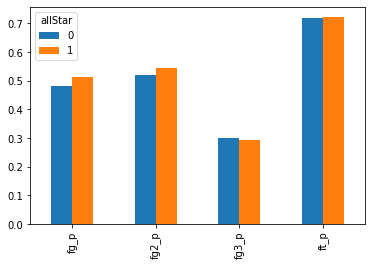

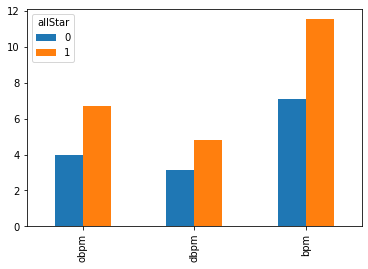

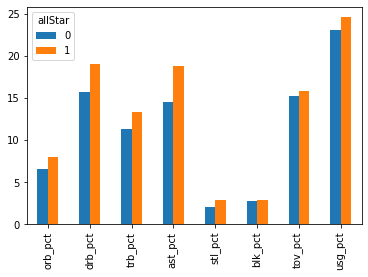

In [18]:
plotGroupBarPlot(mean_statistics.T, ["fg_p", "fg2_p", "fg3_p", "ft_p"])
plotGroupBarPlot(mean_statistics.T, ["obpm", "dbpm", "bpm"])
plotGroupBarPlot(mean_statistics.T, ["orb_pct", "drb_pct", "trb_pct", "ast_pct",
                                     "stl_pct", "blk_pct", "tov_pct", "usg_pct"])

In [10]:
features.to_csv("dataMeanCompleted.csv")

In [11]:
test = features.groupby(["year_drafted", "round", "pick_overall", "player", "school_name"], as_index=False).mean()
test.to_csv("dataMeanPerCollege.csv")

In [19]:
from sklearn.metrics import classification_report as scor

def evaluate(model, test_features, test_labels, treshold):
    predictions = model.predict(test_features)
    print(scor(test_labels, np.where(predictions > treshold, 1, 0),
                target_names = ["NOT All-Star", "All-Star"])
         )
#     error = abs(predictions - test_labels)
#     error_allStars = np.mean(np.take(error, np.where(test_labels == 1)))
#     error_nonAllStars = np.mean(np.take(error, np.where(test_labels == 0)))
#     height = [error_allStars, error_nonAllStars]
#     bars = ("Error All-Stars", "Error Not All-Stars")
#     y_pos =  np.arange(len(bars))
#     plt.bar(y_pos, height, align="center")
#     plt.xticks(y_pos, bars)
#     plt.ylabel("Error%")
#     plt.title("Evaluation")
#     plt.show()
#     print("Error All-Stars:", error_allStars)
    
#     print(predictions)
#     print("Confusion matrix:", confusion_matrix(test_labels, predictions))
#     print("Classification report:", classification_report(test_labels, predictions))
#     print("Accuracy: ", accuracy_score(test_labels, predictions))

In [20]:
def printFeatureImportance(rf, feature_list):
    importances = list(rf.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return feature_importances

In [21]:
def getTrainTest(features):
    np_labels = np.array(features["allStar"])
    temp_features = features.drop(columns=["allStar"])
    feature_list = list(features.columns)
    np_features = np.array(temp_features)
    train_features, test_features, train_labels, test_labels = train_test_split(np_features, 
                                                                                np_labels,
                                                                                test_size = 0.25,
                                                                                random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def randomForest_train_variableImportane(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list
    

In [23]:
features.columns

Index(['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'per', 'obpm',
       'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct', 'trb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg',
       'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'year_drafted', 'round',
       'pick_overall', 'allStar', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p',
       'trb_p', 'ast_p', 'stl_p', 'blk_p'],
      dtype='object')

In [24]:
list_meta_data = ['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr']
list_numeric_features = ['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod',
       'round', 'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p']
fetures_select_all = list_numeric_features + ["allStar"]

In [25]:
rf_base, test_features_base, test_labels_base, feature_list_base = randomForest_train_variableImportane(features[fetures_select_all])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [50]:
treshold = 0.5
evaluate(rf_base, test_features_base, test_labels_base, treshold)
feature_importans = printFeatureImportance(rf_base, feature_list_base)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.33      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.64      0.52      0.53       385
weighted avg       0.92      0.95      0.93       385

Variable: pick_overall         Importance: 0.16
Variable: ws                   Importance: 0.06
Variable: dws                  Importance: 0.05
Variable: trb_p                Importance: 0.05
Variable: pts_pg               Importance: 0.04
Variable: ft_p                 Importance: 0.04
Variable: stl_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: usg_pct              Importance: 0.03
Variable: ows                  Importance: 0.03
V

In [51]:
# we take the firs 10 most important features
list_selected_features = [x[0] for x in feature_importans[:10]]
list_selected_features.append("allStar")

In [52]:
rf_top, test_features_top, test_labels_top, feature_list_top = randomForest_train_variableImportane(features[list_selected_features])

In [53]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)
printFeatureImportance(rf_top, feature_list_top)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.33      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.64      0.52      0.53       385
weighted avg       0.92      0.95      0.93       385

Variable: pick_overall         Importance: 0.23
Variable: ws                   Importance: 0.12
Variable: dws                  Importance: 0.09
Variable: trb_p                Importance: 0.09
Variable: pts_pg               Importance: 0.09
Variable: ft_p                 Importance: 0.09
Variable: stl_p                Importance: 0.09
Variable: efg_pct              Importance: 0.07
Variable: trb_pct              Importance: 0.07
Variable: ts_pct               Importance: 0.06


[('pick_overall', 0.23),
 ('ws', 0.12),
 ('dws', 0.09),
 ('trb_p', 0.09),
 ('pts_pg', 0.09),
 ('ft_p', 0.09),
 ('stl_p', 0.09),
 ('efg_pct', 0.07),
 ('trb_pct', 0.07),
 ('ts_pct', 0.06)]

In [62]:
from sklearn.ensemble import RandomForestClassifier

def randomForestWeight(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    weight = "balanced"
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42, class_weight=weight)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list

In [67]:
rf_weight_top, test_features_weight_top , test_labels_weight_top, feature_list_weight_top = randomForestWeight(features[list_selected_features])

In [68]:
treshold = 0.5
evaluate(rf_weight_top, test_features_weight_top, test_labels_weight_top, treshold)
printFeatureImportance(rf_weight_top, feature_list_weight_top)

              precision    recall  f1-score   support

NOT All-Star       0.95      1.00      0.97       365
    All-Star       0.50      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.73      0.52      0.53       385
weighted avg       0.93      0.95      0.93       385

Variable: pick_overall         Importance: 0.32
Variable: dws                  Importance: 0.13
Variable: ws                   Importance: 0.09
Variable: stl_p                Importance: 0.08
Variable: trb_p                Importance: 0.07
Variable: ft_p                 Importance: 0.07
Variable: ts_pct               Importance: 0.07
Variable: pts_pg               Importance: 0.06
Variable: efg_pct              Importance: 0.06
Variable: trb_pct              Importance: 0.06


[('pick_overall', 0.32),
 ('dws', 0.13),
 ('ws', 0.09),
 ('stl_p', 0.08),
 ('trb_p', 0.07),
 ('ft_p', 0.07),
 ('ts_pct', 0.07),
 ('pts_pg', 0.06),
 ('efg_pct', 0.06),
 ('trb_pct', 0.06)]

In [65]:
rf_weight_base, test_features_weight_base, test_labels_weight_base, feature_list_weight_base = randomForestWeight(features[fetures_select_all])

In [66]:
treshold = 0.5
evaluate(rf_weight_base, test_features_weight_base, test_labels_weight_base, treshold)
printFeatureImportance(rf_weight_base, feature_list_weight_base)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.25      0.05      0.08        20

    accuracy                           0.94       385
   macro avg       0.60      0.52      0.53       385
weighted avg       0.91      0.94      0.92       385

Variable: pick_overall         Importance: 0.2
Variable: dws                  Importance: 0.07
Variable: round                Importance: 0.06
Variable: ws                   Importance: 0.05
Variable: ast_pct              Importance: 0.04
Variable: tov_pct              Importance: 0.04
Variable: per                  Importance: 0.03
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: fg_p                 Importance: 0.03
Variable: ft_p                 Importance: 0.03
Variable: trb_p                Importance: 0.03
Variable: ast_p                Importance: 0.03
Va

[('pick_overall', 0.2),
 ('dws', 0.07),
 ('round', 0.06),
 ('ws', 0.05),
 ('ast_pct', 0.04),
 ('tov_pct', 0.04),
 ('per', 0.03),
 ('ts_pct', 0.03),
 ('efg_pct', 0.03),
 ('trb_pct', 0.03),
 ('fg_p', 0.03),
 ('ft_p', 0.03),
 ('trb_p', 0.03),
 ('ast_p', 0.03),
 ('stl_p', 0.03),
 ('blk_p', 0.03),
 ('obpm', 0.02),
 ('bpm', 0.02),
 ('drb_pct', 0.02),
 ('stl_pct', 0.02),
 ('def_rtg', 0.02),
 ('ows', 0.02),
 ('pts_pg', 0.02),
 ('fg2_p', 0.02),
 ('fg3_p', 0.02),
 ('dbpm', 0.01),
 ('orb_pct', 0.01),
 ('blk_pct', 0.01),
 ('usg_pct', 0.01),
 ('off_rtg', 0.01),
 ('pprod', 0.01)]

# Chestii avansate pe care nu le-am inteles

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [125]:

train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features[fetures_select_all])

In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [72]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [74]:
evaluate(rf_random.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(rf_random.best_estimator_, feature_list)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.33      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.64      0.52      0.53       385
weighted avg       0.92      0.95      0.93       385

Variable: pick_overall         Importance: 0.24
Variable: ws                   Importance: 0.08
Variable: dws                  Importance: 0.06
Variable: tov_pct              Importance: 0.04
Variable: ft_p                 Importance: 0.04
Variable: trb_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: ows                  Importance: 0.03
Variable: pts_pg               Importance: 0.03
Variable: stl_p                Importance: 0.03
Variable: blk_p                Importance: 0.03
Variable: per                  Importance: 0.02
V

In [130]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [100, 300, 500, 1000],
    'max_features' : [5, 10, 20, 30]
}

# Create a based model
rf = RandomForestClassifier(class_weight="balanced")

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = -1, verbose = 2)


In [131]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   28.6s finished
/home/minescoviciu/Facultate/tcri-jupyter/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [134]:
best = grid_search.best_estimator_

In [133]:
evaluate(grid_search.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search.best_estimator_, feature_list)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.98      0.96       365
    All-Star       0.20      0.10      0.13        20

    accuracy                           0.93       385
   macro avg       0.58      0.54      0.55       385
weighted avg       0.91      0.93      0.92       385

Variable: pick_overall         Importance: 0.41
Variable: dws                  Importance: 0.1
Variable: ast_pct              Importance: 0.06
Variable: trb_pct              Importance: 0.04
Variable: tov_pct              Importance: 0.04
Variable: blk_p                Importance: 0.03
Variable: ts_pct               Importance: 0.02
Variable: efg_pct              Importance: 0.02
Variable: stl_pct              Importance: 0.02
Variable: usg_pct              Importance: 0.02
Variable: pts_pg               Importance: 0.02
Variable: fg_p                 Importance: 0.02
Variable: fg2_p                Importance: 0.02
Variable: ft_p                 Importance: 0.02
Va

In [135]:
from sklearn.tree import export_graphviz
# Export as dot file
fetures_name = features[fetures_select_all].drop(columns="allStar").columns
export_graphviz(best.estimators_[13], out_file='tree.dot', 
                feature_names = fetures_name,
                class_names = ["All-Star", "NOT All-Star"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')